In [ ]:
import os
from os.path import dirname, join
from pprint import pprint
from pydicom.data.data_manager import get_files
from pydicom.filereader import read_dicomdir
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
import pydicom as dicom
import json
import pandas as pd
from matplotlib import patches # Библиотека для отрисовки рамки

### Работа с JSON

In [22]:
# Получение списка всех json файлов
json_patch = "D:\For_Publication_v3\Для публикации v3\Protocols"
json_name = os.listdir(path=json_patch)
json_name_full = []
for item in json_name:
    json_name_full.append(json_patch + '\\' + item)

In [26]:
json_name_full[0]

'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json'

In [60]:
# преобразование json в нормальный вид
def test(file_name):

    with open(file_name, "r", encoding='utf-8') as read_file:
        a = str(read_file.read())
    
    a = a.replace('\n', '').replace('\t', '').replace('\ufeff', '')
    b = json.loads(a)
    
    result = []
    try:
        for item in b['nodules']:
            temp = []
            for key, value in item[0].items():
                try:
                    temp.append({'diameter': value['diameter (mm)'], 'x': value['x'], 'y': value['y'], 'z': value['z']})
                except:
                    pass
            result.append(temp)
    except Exception as e:
        print(e)
        return
    return {'name': file_name, 'result_array': result}

In [73]:
t = test(json_name_full[0])
t

{'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json',
 'result_array': [[{'diameter': 6.000000000000001,
    'x': 400.0,
    'y': 281.0,
    'z': 1698.3}],
  [{'diameter': 6.000000000000001, 'x': 417.0, 'y': 251.0, 'z': 1632.7}],
  [{'diameter': 4.0, 'x': 422.0, 'y': 312.0, 'z': 1594.3},
   {'diameter': 4.0, 'x': 422.0, 'y': 314.0, 'z': 1595.1}],
  [{'diameter': 5.0, 'x': 85.0, 'y': 296.0, 'z': 1593.5},
   {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
   {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
   {'diameter': 5.0, 'x': 87.0, 'y': 297.0, 'z': 1593.5}]]}

In [91]:
t['result_array'][4][0]

{'diameter': 4.0, 'x': 131.0, 'y': 289.0, 'z': 1674.1}

In [92]:
name_l = []
diameter_l = []
x_l = []
y_l = []
z_l = []

for i in json_name_full:
    print(f'Start work with file {i}...')
    t = test(i)
    if not t:
        continue
    p_name = t['name'].split('\\')[-1].split('.')[0] # Название протокола
    for j in range(len(t['result_array'])):
        diameter = t['result_array'][j][0]['diameter']
        x = t['result_array'][j][0]['x']
        y = t['result_array'][j][0]['y'] # Координата y для указанного протокола
        z = t['result_array'][j][0]['z']
        name_l.append(p_name)
        diameter_l.append(diameter)
        x_l.append(x)
        y_l.append(y)
        z_l.append(z)
    print(f'Protocol: {p_name}, diameter = {diameter}, x = {x}, y = {y}, z = {z} \n')

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json...
Protocol: RLAD31D006-11315_RLS5A09001KDC6-K00008714, diameter = 5.0, x = 85.0, y = 296.0, z = 1593.5 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-11864_RLS5A09001KDC6-N00009062.json...
Protocol: RLAD31D006-11864_RLS5A09001KDC6-N00009062, diameter = 4.0, x = 123.0, y = 167.0, z = 1689.5 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-12322_RLS5A09001KDC6-K00004491.json...
Protocol: RLAD31D006-12322_RLS5A09001KDC6-K00004491, diameter = 4.0, x = 417.0, y = 306.0, z = 1798.0 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-12323_RLS5A09001KDC6-K00004273.json...
Protocol: RLAD31D006-12323_RLS5A09001KDC6-K00004273, diameter = 4.0, x = 188.0, y = 301.0, z = 1934.9 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-12484_RLS5A09001KDC

Protocol: RLADD01000011798_RLSDD01000011768, diameter = 19.0, x = 74.0, y = 321.0, z = -883.2 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011846_RLSDD01000011815.json...
Protocol: RLADD01000011846_RLSDD01000011815, diameter = 6.000000000000001, x = 105.0, y = 258.0, z = -891.3 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000012145_RLSDD01000012114.json...
Protocol: RLADD01000012145_RLSDD01000012114, diameter = 5.0, x = 456.0, y = 202.0, z = -1303.4 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000012193_RLSDD01000012162.json...
Protocol: RLADD01000012193_RLSDD01000012162, diameter = 5.0, x = 86.0, y = 138.0, z = -1298.7 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000012264_RLSDD01000012233.json...
Protocol: RLADD01000012264_RLSDD01000012233, diameter = 9.0, x = 74.0, y = 299.0, z = -934.3 

Start work with file D:\For_Publication_v3\Для публика

'NoneType' object is not iterable
Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000044253_RLS5A5A001648.json...
Protocol: RLADD01000044253_RLS5A5A001648, diameter = 13.0, x = 415.0, y = 318.0, z = -881.1 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000044503_RLSDD01000044421.json...
Protocol: RLADD01000044503_RLSDD01000044421, diameter = 4.0, x = 95.0, y = 159.0, z = -782.9 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000044587_RLSDD01000044504.json...
Protocol: RLADD01000044587_RLSDD01000044504, diameter = 6.000000000000001, x = 305.0, y = 387.0, z = -822.0 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000044844_RLSDD01000044761.json...
Protocol: RLADD01000044844_RLSDD01000044761, diameter = 15.0, x = 157.0, y = 134.0, z = -814.8 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000045111_RLSDD01000045028.json...
Protocol

Protocol: RLADD01000094997_RLSDD01000094847, diameter = 4.0, x = 158.0, y = 349.0, z = -934.5 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000095737_RLSDD01000095585.json...
'NoneType' object is not iterable
Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000096337_RLSDD01000096185.json...
Protocol: RLADD01000096337_RLSDD01000096185, diameter = 4.0, x = 373.0, y = 239.0, z = -1223.6 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000096338_RLSDD01000096186.json...
Protocol: RLADD01000096338_RLSDD01000096186, diameter = 3.0000000000000004, x = 156.0, y = 296.0, z = 1573.8 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000096584_RLSDD01000096432.json...
'NoneType' object is not iterable
Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000096900_RLSDD01000096748.json...
Protocol: RLADD01000096900_RLSDD01000096748, diameter = 20.0, x

'NoneType' object is not iterable
Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000250346_RLSDD01000263686.json...
Protocol: RLADD01000250346_RLSDD01000263686, diameter = 5.0, x = 413.0, y = 249.0, z = -958.2 

Start work with file D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000268728_RLSDD01000282828.json...
Protocol: RLADD01000268728_RLSDD01000282828, diameter = 10.0, x = 229.0, y = 254.0, z = 1564.5 



Одна опухоль из протокола:  467 rows × 5 columns

In [93]:
df = pd.DataFrame({'Protocol':name_l, 'x': x_l, 'y': y_l, 'z' : z_l, 'diameter' : diameter_l})
df

Protocol      x      y       z  \
0     RLAD31D006-11315_RLS5A09001KDC6-K00008714  400.0  281.0  1698.3   
1     RLAD31D006-11315_RLS5A09001KDC6-K00008714  417.0  251.0  1632.7   
2     RLAD31D006-11315_RLS5A09001KDC6-K00008714  422.0  312.0  1594.3   
3     RLAD31D006-11315_RLS5A09001KDC6-K00008714   85.0  296.0  1593.5   
4     RLAD31D006-11864_RLS5A09001KDC6-N00009062   73.0  296.0  1728.7   
...                                         ...    ...    ...     ...   
3152          RLADD01000268728_RLSDD01000282828  172.0  163.0  1658.9   
3153          RLADD01000268728_RLSDD01000282828  128.0  263.0  1648.5   
3154          RLADD01000268728_RLSDD01000282828  231.0  239.0  1646.9   
3155          RLADD01000268728_RLSDD01000282828  372.0  293.0  1573.3   
3156          RLADD01000268728_RLSDD01000282828  229.0  254.0  1564.5   

      diameter  
0          6.0  
1          6.0  
2          4.0  
3          5.0  
4          6.0  
...        ...  
3152       4.4  
3153       8.0  
3154       6.0  
3155       5.0  
3156      10.0  

[3157 rows x 5 columns]

In [139]:
df.to_pickle("Protocol.pkl")

In [138]:
for i in df['Protocol']:
    print(i)

RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11864_RLS5A09001KDC6-N00009062
RLAD31D006-11864_RLS5A09001KDC6-N00009062
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12323_RLS5A09001KDC6-K00004273
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12985_RLS5A09001KDC6-K00009811
RLAD31D006-12985_RLS5A09001KDC6-K00009811
RLAD31D006-13199_RLSD31D006-13199
RLAD31D006-13199_RLSD31D006-13199
RLAD31D0

RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000029854_RLSDD01000029795
RLADD01000031245_RLSDD01000031179
RLADD01000031245_RLSDD01000031179
RLADD01000031245_RLSDD01000031179
RLADD01000031245_RLSDD01000031179
RLADD01000031245_RLSDD01000031179
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD01000031532_RLSDD01000031466
RLADD010000315

RLADD01000089224_RLSDD01000089097
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089534_RLSDD01000089407
RLADD01000089911_RLSDD01000089774
RLADD01000089911_RLSDD01000089774
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD01000089921_RLSDD01000089784
RLADD010000907

In [94]:
df.describe()

x            y             z     diameter
count  3157.000000  3157.000000   3157.000000  3157.000000
mean    243.742477   263.845423    103.491764     7.759059
std     116.471048    72.856559   1278.721080     6.836344
min      32.000000    14.000000 -12255.900000     1.500000
25%     145.000000   209.000000   -850.900000     4.000000
50%     200.000000   273.000000   -732.100000     6.000000
75%     359.000000   319.000000   1699.900000     9.000000
max     734.000000   996.000000   2023.900000   150.000000

In [83]:
df['diameter'].argmax()

297

In [149]:
df['Protocol'].iloc[0]

'RLAD31D006-11315_RLS5A09001KDC6-K00008714'

### Получение фронтальных сечений со слоем интереса

In [226]:
# Это работает не очень
# def dicom_finder(name):
#     for key, value in main_res.items():
#         if name in key:
#             print(key)
#             print(value[0])
#             for i in value:
#                 print(key, '\\' ,i, sep='')
                
# А вот это вот работает!
def true_dicom_finder(w):
    d = []
    for i in full_dicom_patch:
        s = i.count(w)
        if s > 0:
            d.append(i)
    #print(f'Search word: {w}, s={s}, d= {d}')
    return d

In [297]:
d = true_dicom_finder(df['Protocol'].iloc[0])
b = true_dicom_finder(df['Protocol'].iloc[1])

RLAD31D006-11315_RLS5A09001KDC6-K00008714*
RLAD31D006-11315_RLS5A09001KDC6-K00008714*
RLAD31D006-11315_RLS5A09001KDC6-K00008714*
RLAD31D006-11315_RLS5A09001KDC6-K00008714*
RLAD31D006-11864_RLS5A09001KDC6-N00009062*
RLAD31D006-12322_RLS5A09001KDC6-K00004491*
RLAD31D006-12322_RLS5A09001KDC6-K00004491*
RLAD31D006-12322_RLS5A09001KDC6-K00004491*
RLAD31D006-12484_RLS5A09001KDC6-K00009473*
RLAD31D006-12484_RLS5A09001KDC6-K00009473*
RLAD31D006-12518_RLS5A09001KDC6-K00009499*
RLAD31D006-12518_RLS5A09001KDC6-K00009499*
RLAD31D006-12518_RLS5A09001KDC6-K00009499*
RLAD31D006-12518_RLS5A09001KDC6-K00009499*
RLAD31D006-12518_RLS5A09001KDC6-K00009499*
RLAD31D006-12985_RLS5A09001KDC6-K00009811*
RLAD31D006-13199_RLSD31D006-13199*
RLAD31D006-13199_RLSD31D006-13199*
RLAD31D006-13199_RLSD31D006-13199*
RLAD31D006-13373_RLSD31D006-13373*
RLAD31D006-13373_RLSD31D006-13373*
RLAD31D006-13373_RLSD31D006-13373*
RLAD31D006-13441_RLSD31D006-13441*
RLAD31D006-13646_RLSD31D006-13646*
RLAD31D006-13650_RLSD31D006-1365

RLADD01000052407_RLSDD01000052311*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000052995_RLSDD01000052899*
RLADD01000053245_RLSDD01000053148*
RLADD01000053245_RLSDD01000053148*
RLADD01000053245_RLSDD01000053148*
RLADD01000053245_RLSDD01000053148*
RLADD01000053245_RLSDD01000053148*
RLADD01000053291_RLSDD01000053194*
RLADD01000053291_RLSDD01000053194*
RLADD01000053603_RLSDD01000053506*
RLADD01000053695_RLSDD01000053598*
RLADD01000053695_RLSDD01000053598*
RLADD01000053695_RLSDD01000053598*
RLADD01000053695_RLSDD01000053598*
RLADD01000054331_RLSDD01000054233*
RLADD01000054331_RLSDD01000054233*
RLADD01000054331_RLSDD01000054233*
RLADD01000054331_RLSDD01000054233*
RLADD01000054331_RLSDD01000054233*
RLADD01000054650_RLSDD01000054552*
RLADD01000054650_RLSDD01000054552*
RLADD01000054650_RLSDD01000054552*
RLADD01000054650_RLS

RLADD01000168081_RLSDD01000177101*
RLADD01000168081_RLSDD01000177101*
RLADD01000168081_RLSDD01000177101*
RLADD01000168081_RLSDD01000177101*
RLADD01000168081_RLSDD01000177101*
RLADD01000168081_RLSDD01000177101*
RLADD01000168523_RLSDD01000177561*
RLADD01000168523_RLSDD01000177561*
RLADD01000168523_RLSDD01000177561*
RLADD01000168523_RLSDD01000177561*
RLADD01000168523_RLSDD01000177561*
RLADD01000168523_RLSDD01000177561*
RLADD01000169282_RLSDD01000178382*
RLADD01000169282_RLSDD01000178382*
RLADD01000169282_RLSDD01000178382*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170188_RLSDD01000179428*
RLADD01000170583_RLSDD01000179843*
RLADD01000170583_RLSDD01000179843*
RLADD01000170583_RLSDD01000179843*
RLADD01000170583_RLSDD01000179843*
RLADD01000179304_RLSDD01000189986*
RLADD01000179304_RLS

In [304]:
df['Protocol'].iloc[0]

'RLAD31D006-11315_RLS5A09001KDC6-K00008714'

In [314]:
# Измененный скрипт загрузки, пока используем его

# load the DICOM files
def DICOM3DTransform(prot):
    #d = true_dicom_finder(prot)
    files=[]
    files_arr = true_dicom_finder(prot)
    # print('glob: {}'.format(sys.argv[1]))
    print('loading start...')
    for fname in files_arr:

        # print("loading: {}".format(fname))
        files.append(pydicom.read_file(fname))

    print("Loading done. File count: {}".format(len(files)))

    # skip files with no SliceLocation (eg scout views)
    slices=[]
    skipcount=0
    for f in files:
        if hasattr(f, 'SliceLocation'):
            slices.append(f)
        else:
            skipcount = skipcount + 1

    print("skipped, no SliceLocation: {}".format(skipcount))

    # ensure they are in the correct order
    print('Sorting start...')
    slices = sorted(slices, key=lambda s: s.SliceLocation)
    print('Sorting complete.')
    # pixel aspects, assuming all slices are the same
    ps = slices[0].PixelSpacing
    ss = slices[0].SliceThickness
    ax_aspect = ps[1]/ps[0]
    sag_aspect = ps[1]/ss
    cor_aspect = ss/ps[0]

    # create 3D array
    print('create 3D array start...')
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d=np.zeros(img_shape)
    print('create 3D array complete.')


    # fill 3D array with the images from the files и добавление з
    print('fill 3D array start...')
    ipp = [] # ImagePositionPatient[2] будет храниться тут
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:,:,i] = img2d
        ipp.append(slices[i].ImagePositionPatient[2])
    print('fill 3D array complete.')
    print('Well done!')
    return img3d, ipp

In [ ]:
# a, b = DICOM3DTransform(d)

In [251]:
# ImagePositionPatient[2]
print(int(df['z'].iloc[0]))
print(len(ipp))
print(ipp.index(int(df['z'].iloc[0])))
print(max(ipp))
print(min(ipp))
print(max(ipp) - min(ipp))

1698
1062
1813.50
1448.50
365.0


In [255]:
# Поиск ближайшего значения
def nearest(lst, target):
    return min(lst, key=lambda x: abs(x-target))

print(nearest(ipp, 1698))

1698.30


In [324]:
# Получение всех слайсов и сохранение в png


def ImageSwapper(index, img3d_ipp):
    img3d, ipp = img3d_ipp
    fig = plt.figure() # Отрисовка рамки

    # Задание осей
    ax = fig.add_axes([0,0,1,1])
    
    print(f'Current coordinates for index {index}:')
    y_temp = df['y'].iloc[index]
    print(y_temp)
    x = int(df['x'].iloc[index]) # x на фронтальном срезе
    y = int(df['y'].iloc[index]) # z на фронтальном срезе
    zm = int(df['z'].iloc[index]) # y на фронтальном срезе
    z = ipp.index((nearest(ipp, zm)))
    dm = df['diameter'].iloc[index]
    d = dm / slices[0].PixelSpacing[0]
    xmin = x - d / 2
    xmax = x + d / 2
    ymin = z - d / 2
    ymax = z + d / 2
    width = xmax - xmin
    height = ymax - ymin
    print(f'width: {width}, height: {height}')
    # read and plot the image
    image = img3d[y,:,:].T
    #plt.imshow(image, aspect='auto')
    save_name = 'img\\' + str(index)
    plt.savefig(save_name)
    edgecolor = 'r'
    ax.annotate('tumor', xy=(xmax,ymin))
    # rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    rect = patches.Rectangle((xmin-10,ymin-10), width+20, height+20, edgecolor = edgecolor, facecolor = 'none')
    ax.add_patch(rect)
    fig.set_figwidth(20)    #  ширина и
    fig.set_figheight(20)    #  высота "Figure"

Current coordinates for index 0:
281.0
width: 8.152173913043498, height: 8.152173913043498


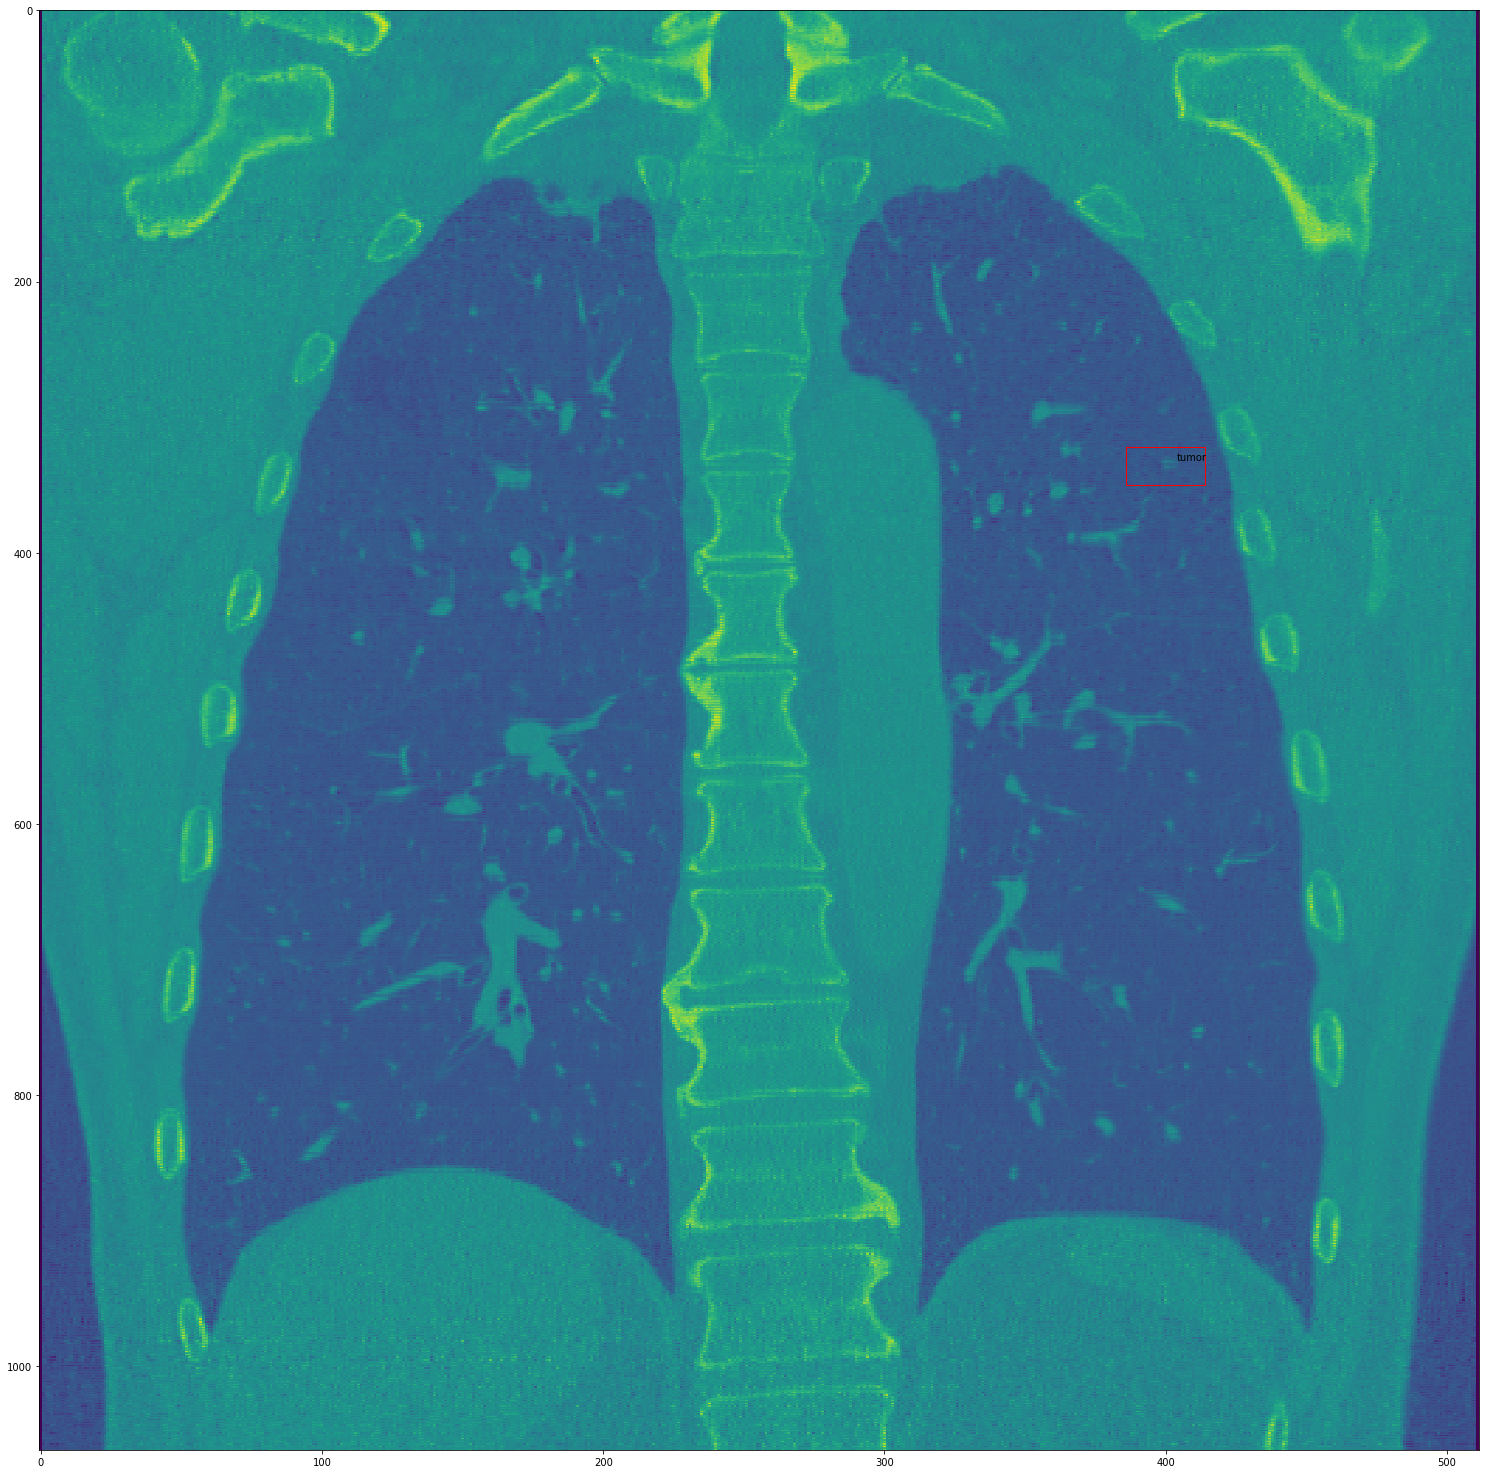

In [323]:
ImageSwapper(0, img3d)

In [ ]:
# Полный генератор изображений
print('Initialization of start parameters...')
init_sample = df['Protocol'].iloc[220]
current_thrd = DICOM3DTransform(init_sample)
print('Start parameters initialized')

for i in range(len(df['Protocol'])):
    prot = df['Protocol'].iloc[i]
    print(f'Start working with {i} index, file: {prot}')
    # current_thrd = test_slider(thrd)
    if df['Protocol'].iloc[i] == init_sample:
        print('Continue to work with the current 3D-array...')
        print(f'Index: {i}')
        ImageSwapper(i, current_thrd)
        prot = df['Protocol'].iloc[i]
        print(f'Done for tumor {i} on file {prot}')
        #print(current_thrd)
    else:
        prot = df['Protocol'].iloc[i]
        print(f'Create new 3D-array for tumor {i} on file {prot}...')
        init_sample = df['Protocol'].iloc[i]
        current_thrd = DICOM3DTransform(init_sample)
        prot = df['Protocol'].iloc[i]
        print(f'Done for tumor {i} on file {prot}')

Initialization of start parameters...
loading start...
Loading done. File count: 1062
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Start parameters initialized
Start working with 0 index, file: RLAD31D006-11315_RLS5A09001KDC6-K00008714
Continue to work with the current 3D-array...
Index: 0
Current coordinates for index 0:
281.0
width: 8.152173913043498, height: 8.152173913043498
Done for tumor 0 on file RLAD31D006-11315_RLS5A09001KDC6-K00008714
Start working with 1 index, file: RLAD31D006-11315_RLS5A09001KDC6-K00008714
Continue to work with the current 3D-array...
Index: 1
Current coordinates for index 1:
251.0
width: 8.152173913043498, height: 8.152173913043498
Done for tumor 1 on file RLAD31D006-11315_RLS5A09001KDC6-K00008714
Start working with 2 index, file: RLAD31D006-11315_RLS5A09001KDC6-K00008714
Continue to work with the current 3D-array...
Index: 2
Cur

Current coordinates for index 23:
148.0
width: 5.4347826086956275, height: 5.4347826086956275
Done for tumor 23 on file RLAD31D006-13199_RLSD31D006-13199
Start working with 24 index, file: RLAD31D006-13199_RLSD31D006-13199
Continue to work with the current 3D-array...
Index: 24
Current coordinates for index 24:
209.0
width: 5.4347826086956275, height: 5.434782608695741
Done for tumor 24 on file RLAD31D006-13199_RLSD31D006-13199
Start working with 25 index, file: RLAD31D006-13199_RLSD31D006-13199
Continue to work with the current 3D-array...
Index: 25
Current coordinates for index 25:
127.0
width: 19.021739130434753, height: 19.021739130434753
Done for tumor 25 on file RLAD31D006-13199_RLSD31D006-13199
Start working with 26 index, file: RLAD31D006-13373_RLSD31D006-13373
Create new 3D-array for tumor 26 on file RLAD31D006-13373_RLSD31D006-13373...
loading start...
Loading done. File count: 800
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create

C:\Users\nonam\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Done for tumor 28 on file RLAD31D006-13373_RLSD31D006-13373
Start working with 29 index, file: RLAD31D006-13373_RLSD31D006-13373
Continue to work with the current 3D-array...
Index: 29
Current coordinates for index 29:
131.0
width: 6.793478260869563, height: 6.79347826086962
Done for tumor 29 on file RLAD31D006-13373_RLSD31D006-13373
Start working with 30 index, file: RLAD31D006-13380_RLSD31D006-13380
Create new 3D-array for tumor 30 on file RLAD31D006-13380_RLSD31D006-13380...
loading start...
Loading done. File count: 844
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 30 on file RLAD31D006-13380_RLSD31D006-13380
Start working with 31 index, file: RLAD31D006-13441_RLSD31D006-13441
Create new 3D-array for tumor 31 on file RLAD31D006-13441_RLSD31D006-13441...
loading start...
Loading done. File count: 874
skipped, no SliceLocation: 0
Sorting start.

fill 3D array complete.
Well done!
Done for tumor 54 on file RLAD31D006-14293_RLSD31D006-14293
Start working with 55 index, file: RLAD31D006-14415_RLSD31D006-14415
Create new 3D-array for tumor 55 on file RLAD31D006-14415_RLSD31D006-14415...
loading start...
Loading done. File count: 816
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 55 on file RLAD31D006-14415_RLSD31D006-14415
Start working with 56 index, file: RLAD31D006-14415_RLSD31D006-14415
Continue to work with the current 3D-array...
Index: 56
Current coordinates for index 56:
348.0
width: 5.4347826086956275, height: 5.4347826086956275
Done for tumor 56 on file RLAD31D006-14415_RLSD31D006-14415
Start working with 57 index, file: RLAD31D006-14415_RLSD31D006-14415
Continue to work with the current 3D-array...
Index: 57
Current coordinates for index 57:
133.0
width: 31.25, height: 31.25
Done f

Done for tumor 82 on file RLAD31D006-14718_RLSD31D006-14718
Start working with 83 index, file: RLAD31D006-14718_RLSD31D006-14718
Continue to work with the current 3D-array...
Index: 83
Current coordinates for index 83:
126.0
width: 25.815217391304344, height: 25.81521739130426
Done for tumor 83 on file RLAD31D006-14718_RLSD31D006-14718
Start working with 84 index, file: RLAD31D006-14718_RLSD31D006-14718
Continue to work with the current 3D-array...
Index: 84
Current coordinates for index 84:
307.0
width: 6.793478260869563, height: 6.793478260869506
Done for tumor 84 on file RLAD31D006-14718_RLSD31D006-14718
Start working with 85 index, file: RLAD31D006-14949_RLSD31D006-14949
Create new 3D-array for tumor 85 on file RLAD31D006-14949_RLSD31D006-14949...
loading start...
Loading done. File count: 758
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 85 

Current coordinates for index 110:
210.0
width: 13.586956521739125, height: 13.586956521739125
Done for tumor 110 on file RLAD31D006-15453_RLSD31D006-15453
Start working with 111 index, file: RLAD31D006-15453_RLSD31D006-15453
Continue to work with the current 3D-array...
Index: 111
Current coordinates for index 111:
230.0
width: 6.793478260869563, height: 6.79347826086962
Done for tumor 111 on file RLAD31D006-15453_RLSD31D006-15453
Start working with 112 index, file: RLAD31D006-15453_RLSD31D006-15453
Continue to work with the current 3D-array...
Index: 112
Current coordinates for index 112:
291.0
width: 8.152173913043498, height: 8.152173913043498
Done for tumor 112 on file RLAD31D006-15453_RLSD31D006-15453
Start working with 113 index, file: RLAD31D006-15453_RLSD31D006-15453
Continue to work with the current 3D-array...
Index: 113
Current coordinates for index 113:
138.0
width: 6.793478260869563, height: 6.79347826086962
Done for tumor 113 on file RLAD31D006-15453_RLSD31D006-15453
Sta

fill 3D array complete.
Well done!
Done for tumor 137 on file RLAD31D006-15688_RLSD31D006-15688
Start working with 138 index, file: RLAD31D006-15688_RLSD31D006-15688
Continue to work with the current 3D-array...
Index: 138
Current coordinates for index 138:
314.0
width: 4.483695652173878, height: 4.483695652173878
Done for tumor 138 on file RLAD31D006-15688_RLSD31D006-15688
Start working with 139 index, file: RLAD31D006-15688_RLSD31D006-15688
Continue to work with the current 3D-array...
Index: 139
Current coordinates for index 139:
175.0
width: 10.869565217391255, height: 10.869565217391255
Done for tumor 139 on file RLAD31D006-15688_RLSD31D006-15688
Start working with 140 index, file: RLAD31D006-15688_RLSD31D006-15688
Continue to work with the current 3D-array...
Index: 140
Current coordinates for index 140:
193.0
width: 8.152173913043498, height: 8.152173913043498
Done for tumor 140 on file RLAD31D006-15688_RLSD31D006-15688
Start working with 141 index, file: RLAD31D006-15688_RLSD31

Done for tumor 165 on file RLAD31D006-16071_RLSD31D006-16071
Start working with 166 index, file: RLAD31D006-16134_RLSD31D006-16134
Create new 3D-array for tumor 166 on file RLAD31D006-16134_RLSD31D006-16134...
loading start...
Loading done. File count: 816
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 166 on file RLAD31D006-16134_RLSD31D006-16134
Start working with 167 index, file: RLAD31D006-16134_RLSD31D006-16134
Continue to work with the current 3D-array...
Index: 167
Current coordinates for index 167:
147.0
width: 4.076086956521749, height: 4.076086956521749
Done for tumor 167 on file RLAD31D006-16134_RLSD31D006-16134
Start working with 168 index, file: RLAD31D006-16134_RLSD31D006-16134
Continue to work with the current 3D-array...
Index: 168
Current coordinates for index 168:
367.0
width: 8.152173913043498, height: 8.152173913043498
Done for

Done for tumor 191 on file RLAD31D006-17811_RLSD31D006-17811
Start working with 192 index, file: RLAD31D006-17811_RLSD31D006-17811
Continue to work with the current 3D-array...
Index: 192
Current coordinates for index 192:
147.0
width: 9.510869565217376, height: 9.510869565217376
Done for tumor 192 on file RLAD31D006-17811_RLSD31D006-17811
Start working with 193 index, file: RLAD31D006-17811_RLSD31D006-17811
Continue to work with the current 3D-array...
Index: 193
Current coordinates for index 193:
349.0
width: 6.79347826086962, height: 6.793478260869563
Done for tumor 193 on file RLAD31D006-17811_RLSD31D006-17811
Start working with 194 index, file: RLAD31D006-17811_RLSD31D006-17811
Continue to work with the current 3D-array...
Index: 194
Current coordinates for index 194:
213.0
width: 10.869565217391255, height: 10.869565217391255
Done for tumor 194 on file RLAD31D006-17811_RLSD31D006-17811
Start working with 195 index, file: RLAD31D006-17811_RLSD31D006-17811
Continue to work with the

Done for tumor 220 on file RLADD01000005675_RLSDD01000005658
Start working with 221 index, file: RLADD01000005718_RLSDD01000005701
Create new 3D-array for tumor 221 on file RLADD01000005718_RLSDD01000005701...
loading start...
Loading done. File count: 401
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 221 on file RLADD01000005718_RLSDD01000005701
Start working with 222 index, file: RLADD01000006233_RLSDD01000006214
Create new 3D-array for tumor 222 on file RLADD01000006233_RLSDD01000006214...
loading start...
Loading done. File count: 1330
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
Well done!
Done for tumor 222 on file RLADD01000006233_RLSDD01000006214
Start working with 223 index, file: RLADD01000006301_RLSDD01000006282
Create n

In [317]:
for i in range(len(df['Protocol'])):
    print(i)
#     len(df['Protocol'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345


#### Код, который пока вроде ничего не делает, но есть, удалять рано

In [250]:
file_list = ['RLADD01000009306_RLSDD01000009279.json', 'RLADD01000009306_RLSDD01000009279.json']
# Формирование списка всех параметров опухолей
new_res = []

for file in json_name_full:
    try:
        new_res.append(test(file))
    except:
        print(file)

D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-14010_RLSD31D006-14010.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLAD31D006-17012_RLSD31D006-17012.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000005928_RLSDD01000005911.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000007802_RLSDD01000007781.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000009500_RLSDD01000009473.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000010469_RLSDD01000010441.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000010708_RLSDD01000010680.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011007_RLSDD01000010978.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011304_RLSDD01000011275.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011677_RLSDD01000011647.json
D:\For_Publication_v3\Для публикации v3\Protocols\RLADD01000011678_RLSDD01000011648.json
D:\For_Publication_v3

In [252]:
new_res

[{'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11315_RLS5A09001KDC6-K00008714.json',
  'result_array': [[{'diameter': 6.000000000000001,
     'x': 400.0,
     'y': 281.0,
     'z': 1698.3}],
   [{'diameter': 6.000000000000001, 'x': 417.0, 'y': 251.0, 'z': 1632.7}],
   [{'diameter': 4.0, 'x': 422.0, 'y': 312.0, 'z': 1594.3},
    {'diameter': 4.0, 'x': 422.0, 'y': 314.0, 'z': 1595.1}],
   [{'diameter': 5.0, 'x': 85.0, 'y': 296.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 85.0, 'y': 297.0, 'z': 1593.5},
    {'diameter': 5.0, 'x': 87.0, 'y': 297.0, 'z': 1593.5}]]},
 {'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols\\RLAD31D006-11864_RLS5A09001KDC6-N00009062.json',
  'result_array': [[{'diameter': 6.000000000000001,
     'x': 73.0,
     'y': 296.0,
     'z': 1728.7}],
   [{'diameter': 4.0, 'x': 123.0, 'y': 167.0, 'z': 1689.5}]]},
 {'name': 'D:\\For_Publication_v3\\Для публикации v3\\Protocols

In [251]:
new_res[1]['result_array'][0][0]['x']

73.0

In [221]:
t1 = []
t2 = []
t1.append(t2)
t1

[[]]

In [220]:
result

[[{'diameter': 3.5, 'x': 358.0, 'y': 314.0, 'z': 1903.7}],
 [{'diameter': 4.0, 'x': 161.0, 'y': 204.0, 'z': 1903.5}],
 [{'diameter': 5.0, 'x': 215.0, 'y': 180.0, 'z': 1863.0}],
 [{'diameter': 3.7, 'x': 327.0, 'y': 345.0, 'z': 1737.3},
  {'diameter': 3.0000000000000004, 'x': 327.0, 'y': 344.0, 'z': 1737.3}]]

In [ ]:
full = result.append('name')
full

In [203]:
b.keys()

AttributeError: 'list' object has no attribute 'keys'

In [202]:
b['nodules'][0][0]['012']['diameter (mm)']

TypeError: list indices must be integers or slices, not str

In [138]:
b['nodules'][0][0]['012']['x']

358.0

In [140]:
b['nodules'][0][0]['012']['y']

314.0

In [141]:
b['nodules'][0][0]['012']['z']

1903.7

In [146]:
b['nodules'][4]

IndexError: list index out of range

In [167]:
a = []
for i in b['nodules']:
    print (i)
    a.append(i)
#     for j in i:
        #print(j)
#         for k in j:
            #print(k)
#             for l in k:
#                 print(l)
    #print(b['nodules'][i])

[{'012': {'diameter (mm)': 3.5, 'expert decision': [{'comment': '', 'decision': 'doubt', 'id': 'Валерия', 'machine learning': False, 'proper size': True, 'type': 'с'}], 'series no': '4', 'type': 'с', 'version': '4.0', 'x': 358.0, 'y': 314.0, 'z': 1903.7, 'z type': 'mm'}, '013': None, '014': None}]
[{'012': None, '013': {'diameter (mm)': 4.0, 'expert decision': [{'comment': '', 'decision': 'confirmed', 'id': 'Валерия', 'machine learning': True, 'proper size': True, 'type': 'п'}], 'series no': '5', 'type': 'п', 'version': '4.0', 'x': 161.0, 'y': 204.0, 'z': 1903.5, 'z type': 'mm'}, '014': None}]
[{'012': None, '013': {'diameter (mm)': 5.0, 'expert decision': [{'comment': '', 'decision': 'rejected', 'id': 'Валерия', 'machine learning': False, 'proper size': False, 'type': ''}], 'series no': '5', 'type': 'п', 'version': '4.0', 'x': 215.0, 'y': 180.0, 'z': 1863.0, 'z type': 'mm'}, '014': None}]
[{'012': {'diameter (mm)': 3.7, 'expert decision': [{'comment': '', 'decision': 'confirmed', 'id'

In [197]:
e = 0
while e < 20:
    print(a[3][0][str(e)])
#     try:
#         print(a[3][0][str(e)])
#         e += 1
#     except:
#         e += 1

KeyError: '0'

In [198]:
e = 12
print(a[3][0][str(e)])

KeyError: '12'

In [177]:
b = []
for i in a[0]:
    b.append(i)

In [178]:
b

[{'012': {'diameter (mm)': 3.5,
   'expert decision': [{'comment': '',
     'decision': 'doubt',
     'id': 'Валерия',
     'machine learning': False,
     'proper size': True,
     'type': 'с'}],
   'series no': '4',
   'type': 'с',
   'version': '4.0',
   'x': 358.0,
   'y': 314.0,
   'z': 1903.7,
   'z type': 'mm'},
  '013': None,
  '014': None}]

In [175]:
c = []
for i in b:
    c.append(i)

In [176]:
c

[[{'012': {'diameter (mm)': 3.5,
    'expert decision': [{'comment': '',
      'decision': 'doubt',
      'id': 'Валерия',
      'machine learning': False,
      'proper size': True,
      'type': 'с'}],
    'series no': '4',
    'type': 'с',
    'version': '4.0',
    'x': 358.0,
    'y': 314.0,
    'z': 1903.7,
    'z type': 'mm'},
   '013': None,
   '014': None}],
 [{'012': None,
   '013': {'diameter (mm)': 4.0,
    'expert decision': [{'comment': '',
      'decision': 'confirmed',
      'id': 'Валерия',
      'machine learning': True,
      'proper size': True,
      'type': 'п'}],
    'series no': '5',
    'type': 'п',
    'version': '4.0',
    'x': 161.0,
    'y': 204.0,
    'z': 1903.5,
    'z type': 'mm'},
   '014': None}],
 [{'012': None,
   '013': {'diameter (mm)': 5.0,
    'expert decision': [{'comment': '',
      'decision': 'rejected',
      'id': 'Валерия',
      'machine learning': False,
      'proper size': False,
      'type': ''}],
    'series no': '5',
    'type': 'п

In [8]:
# Этот код пока вроде не нужен

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

# fetch the path to the test data
#filepath = get_testdata_file('DICOMDIR')

# Код перенесен выше
# files_arr = get_files(r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT',
#                      r'CT_1.2.276.0.7230010.3.1.4.1417964692')
# print('Path to the DICOM directory: {}'.format(filepath))
# # load the data
for item in files_arr:
    dicom_dir = read_dicomdir(item)
    base_dir = dirname(item)


    # print(dicom_dir)
    # print(dicom_dir.patient_records)

    # go through the patient record and print information
    for patient_record in files_arr:
        if (hasattr(patient_record, 'PatientID') and
                hasattr(patient_record, 'PatientName')):
            print("Patient: {}: {}".format(patient_record.PatientID,
                                           patient_record.PatientName))
        studies = patient_record.children
        # got through each serie
        for study in studies:
            print(" " * 4 + "Study {}: {}: {}".format(study.StudyID,
                                                      study.StudyDate,
                                                      study.StudyDescription))
            all_series = study.children
            # go through each serie
            for series in all_series:
                image_count = len(series.children)
                plural = ('', 's')[image_count > 1]

                # Write basic series info and image count

                # Put N/A in if no Series Description
                if 'SeriesDescription' not in series:
                    series.SeriesDescription = "N/A"
                print(" " * 8 + "Series {}: {}: {} ({} image{})".format(
                    series.SeriesNumber, series.Modality, series.SeriesDescription,
                    image_count, plural))

                # Open and read something from each image, for demonstration
                # purposes. For simple quick overview of DICOMDIR, leave the
                # following out
                print(" " * 12 + "Reading images...")
                image_records = series.children
                image_filenames = [join(base_dir, *image_rec.ReferencedFileID)
                                   for image_rec in image_records]

                datasets = [pydicom.dcmread(image_filename)
                            for image_filename in image_filenames]

                patient_names = set(ds.PatientName for ds in datasets)
                patient_IDs = set(ds.PatientID for ds in datasets)

                # List the image filenames
                print("\n" + " " * 12 + "Image filenames:")
                print(" " * 12, end=' ')
                pprint(image_filenames, indent=12)

                # Expect all images to have same patient name, id
                # Show the set of all names, IDs found (should each have one)
                print(" " * 12 + "Patient Names in images..: {}".format(
                    patient_names))
                print(" " * 12 + "Patient IDs in images..: {}".format(
                    patient_IDs))

InvalidDicomError: File 'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16972' is not a Media Storage Directory file

In [3]:
ds = pydicom.dcmread("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")

In [ ]:
pydicom.read_file("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")

In [96]:
files_arr

['C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16972',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16973',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16974',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16975',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16976',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16977',
 'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010

In [10]:
ds.SliceLocation
# Поиск нужного слайда по z в аксиальном срезе
def z_finder():
    for item in files_arr:
        #print(item)
        rf = pydicom.read_file(item)
        if rf.ImagePositionPatient[2] == 1737.3:
            plt.imshow(rf.pixel_array, cmap='gray', interpolation='none') 
        #print(rf.ImagePositionPatient)
        #print(f'Location: {rf.SliceLocation}, Instance Number: {rf.InstanceNumber}')
        #plt.imshow(rf.pixel_array, cmap='gray') 

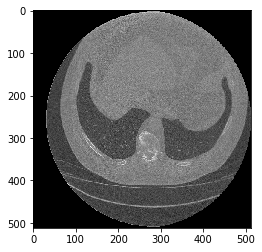

In [11]:
z_finder()

In [52]:

ds.ImagePositionPatient[2]

"1725.3"

In [2]:
files_arr[1]

NameError: name 'files_arr' is not defined

In [10]:
ds.PixelData

b'\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\x

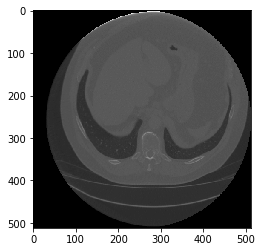

In [12]:
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array, cmap='gray') 

In [26]:
dspa = ds.pixel_array
dspa.shape

(512, 512)

In [14]:
ds.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [13]:
len(files_arr)
len(set(files_arr))

1743

In [17]:
get_testdata_file(r'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')

In [ ]:
DATA_ROOT = abspath(dirname(__file__))
data_path = join(DATA_ROOT, 'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')
for root, _, filenames in os.walk(data_path):
    for filename in filenames:
        if filename == name:
            return os.path.join(root, filename)

In [20]:
# https://stackoverflow.com/questions/53837060/extract-sagittal-and-coronal-cuts-from-axial-view-using-pydicom


#root_dir = r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT'


def sortDcm():
        # print('Given Path to the .dcm directory is: {}'.format(root_dir))
        # slices = [dicom.read_file(root_dir + '/' + s) for s in os.listdir(root_dir)]
        slices = [pydicom.read_file(s) for s in files_arr]
        slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
        pos1 = slices[int(len(slices)/2)].ImagePositionPatient[2]
        pos2 = slices[(int(len(slices)/2)) + 1].ImagePositionPatient[2]
        diff = pos2 - pos1
#        if diff > 0:
#            slices = np.flipud(slices)
        try:
            slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
        except:
            slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

        for s in slices:
            s.SliceThickness = slice_thickness
#        print("from sorted dicom",len(slices))         
        return slices 


dcms = sortDcm()
ref_dicom = dcms[0]

d_array = np.zeros((ref_dicom.Columns,ref_dicom.Rows, len(dcms)), dtype=ref_dicom.pixel_array.dtype)

# for dcm in dcms:
#     d_array[:, :, dcms.index(dcm)] = dcm.pixel_array
#     #i = 1
#     #while i < 2:
# #         fig = plt.figure(figsize=(12,12))
# #         plt.subplot(1, 3, 1)
# #         plt.title("Coronal")
# #         plt.imshow(np.flipud(d_array[idx , :, :].T))
# #         #plt.subplot(1, 3, 2)
# #         plt.title("Sagital")
# #         plt.imshow(np.flipud(d_array[:, idy, :].T))
# #         plt.subplot(1, 3, 3)
#     plt.title("axial")
#     plt.imshow(d_array[:, :, dcms.index(dcm)])
#     plt.pause(0.001)
#     #i += 1

In [24]:

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
#then to view sagittal and coronal slices for each of the axial slice
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
    corId = corId-1
    sagId = sagId-1
#    plot 3 orthogonal slices
    a1 = plt.subplot(1,3,1)
    plt.title('Axial')
    plt.imshow(img3d[:,:,i],'gray')
    a1.set_aspect(ax_aspect)

    a2 = plt.subplot(1,3,2)
    plt.title('Sagittal')
    plt.imshow(np.flipud(img3d[:,sagId,:].T),'gray')
    a2.set_aspect(sag_aspect)

    a3 = plt.subplot(1,3,3)
    plt.imshow(np.flipud(img3d[corId,:,:].T),'gray')
    a3.set_aspect(cor_aspect)
    plt.title('Coronal')
    plt.show()
    plt.pause(0.001)  

In [10]:
# Тестовая загрузка одного набора слайсов
# files_arr = get_files(r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT',
#                      r'CT_1.2.276.0.7230010.3.1.4.1417964692')

In [97]:
# Получение списка всех dicom файлов
# dicom_patch = "D:\For_Publication_v3\Для публикации v3\Dicom"
# dicom_name_1 = os.listdir(path=dicom_patch)

# dicom_name_full = []
# for item in dicom_name_1:
#     dicom_name_full.append(dicom_patch + '\\' + item)

# dicom_name_2 = os.listdir(path=dicom_name_full[0])

# for item in dicom_name_2:
#     dicom_name_full_2.append()

In [3]:
# for top, dirs, files in os.walk('D:\For_Publication_v3\Для публикации v3\Dicom'):
#     for nm in files:       
#         print (os.path.join(top, nm))
# tree = os.walk('D:\For_Publication_v3\Для публикации v3\Dicom')

In [143]:
# a = []
# for i in os.walk('D:\For_Publication_v3\Для публикации v3\Dicom'):
#     a.append(i)
# b = a[::4]
# c = b[::3]
# main_res = {}
# for i in range(1, len(c)):
#     main_res[c[i][0]] = c[i][2]

In [225]:
# # Эксперименты с os.walk
# folder = []
# for i in os.walk('D:\For_Publication_v3\Для публикации v3\Dicom'):
#     folder.append(i)

# full_dicom_patch = []
# for address, dirs, files in folder:
#     for file in files:
#         full_dicom_patch.append(address+'\\'+file)

In [197]:
# S = full_dicom_patch[4]
# S.count('RLAD31D006-11315_RLS5A09001KDC6-K00008714')
# for i in df['Protocol']:
#     print(i)
# for i in full_dicom_patch:
#     if i.count('RLAD31D006-11315_RLS5A09001KDC6-K00008714') > 0:
#         print(i.count('RLAD31D006-11315_RLS5A09001KDC6-K00008714'))

RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11315_RLS5A09001KDC6-K00008714
RLAD31D006-11864_RLS5A09001KDC6-N00009062
RLAD31D006-11864_RLS5A09001KDC6-N00009062
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12322_RLS5A09001KDC6-K00004491
RLAD31D006-12323_RLS5A09001KDC6-K00004273
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12484_RLS5A09001KDC6-K00009473
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12518_RLS5A09001KDC6-K00009499
RLAD31D006-12985_RLS5A09001KDC6-K00009811
RLAD31D006-12985_RLS5A09001KDC6-K00009811
RLAD31D006-13199_RLSD31D006-13199
RLAD31D006-13199_RLSD31D006-13199
RLAD31D0

RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000044844_RLSDD01000044761
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045111_RLSDD01000045028
RLADD01000045728_RLSDD01000045645
RLADD01000045728_RLSDD01000045645
RLADD010000457

RLADD01000104158_RLSDD01000103978
RLADD01000104158_RLSDD01000103978
RLADD01000104427_RLSDD01000104247
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104453_RLSDD01000104273
RLADD01000104544_RLSDD01000104364
RLADD01000104544_RLSDD01000104364
RLADD01000104544_RLSDD01000104364
RLADD01000104544_RLSDD01000104364
RLADD01000104544_RLSDD01000104364
RLADD01000104544_RLSDD01000104364
RLADD01000104693_RLSDD01000104513
RLADD01000104693_RLSDD01000104513
RLADD01000104693_RLSDD01000104513
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD01000105804_RLSDD01000105886
RLADD010001058

In [181]:
# for i in df['Protocol']:
#     print(i)
# Full_path_key = []
# for i in main_res:
#     print(i)
# print(dicom_finder('RLAD31D006-11315_RLS5A09001KDC6-K00008714'))

None


In [182]:
df['Protocol'].iloc[0]

'RLAD31D006-11315_RLS5A09001KDC6-K00008714'

In [155]:
# len(main_res)

137

In [156]:
# main_res['D:\\For_Publication_v3\\Для публикации v3\\Dicom\\RLAD31D006-12323_RLS5A09001KDC6-K00004273\\CT\\Chest HCT'][17]

'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348603'

In [165]:
# main_res

{'D:\\For_Publication_v3\\Для публикации v3\\Dicom\\RLAD31D006-12323_RLS5A09001KDC6-K00004273\\CT\\Chest HCT': ['CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348586',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348587',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348588',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348589',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348590',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348591',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348592',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348593',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348594',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348595',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348596',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348597',
  'CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568750084.348598',
  'CT_1.2.276.0.723

In [252]:
ipp

["1813.5",
 "1813.5",
 "1813.5",
 "1813.5",
 "1812.7",
 "1812.7",
 "1811.9",
 "1811.9",
 "1811.1",
 "1811.1",
 "1810.3",
 "1810.3",
 "1809.5",
 "1809.5",
 "1808.7",
 "1808.7",
 "1808.5",
 "1808.5",
 "1807.9",
 "1807.9",
 "1807.1",
 "1807.1",
 "1806.3",
 "1806.3",
 "1805.5",
 "1805.5",
 "1804.7",
 "1804.7",
 "1803.9",
 "1803.9",
 "1803.5",
 "1803.5",
 "1803.1",
 "1803.1",
 "1802.3",
 "1802.3",
 "1801.5",
 "1801.5",
 "1800.7",
 "1800.7",
 "1799.9",
 "1799.9",
 "1799.1",
 "1799.1",
 "1798.5",
 "1798.5",
 "1798.3",
 "1798.3",
 "1797.5",
 "1797.5",
 "1796.7",
 "1796.7",
 "1795.9",
 "1795.9",
 "1795.1",
 "1795.1",
 "1794.3",
 "1794.3",
 "1793.5",
 "1793.5",
 "1793.5",
 "1793.5",
 "1792.7",
 "1792.7",
 "1791.9",
 "1791.9",
 "1791.1",
 "1791.1",
 "1790.3",
 "1790.3",
 "1789.5",
 "1789.5",
 "1788.7",
 "1788.7",
 "1788.5",
 "1788.5",
 "1787.9",
 "1787.9",
 "1787.1",
 "1787.1",
 "1786.3",
 "1786.3",
 "1785.5",
 "1785.5",
 "1784.7",
 "1784.7",
 "1783.9",
 "1783.9",
 "1783.5",
 "1783.5",
 "1783.1",

In [234]:
cor_aspect

6.793478260869565

In [32]:
sys.argv

['C:\\Users\\nonam\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\nonam\\AppData\\Roaming\\jupyter\\runtime\\kernel-c59ef720-6b26-4a77-9330-1777800fded4.json']

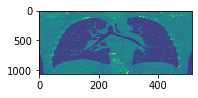

In [235]:
a3 = plt.subplot(2,2,3)
plt.imshow(img3d[img_shape[0]//2,:,:].T)
a3.set_aspect(0.2)
plt.show()

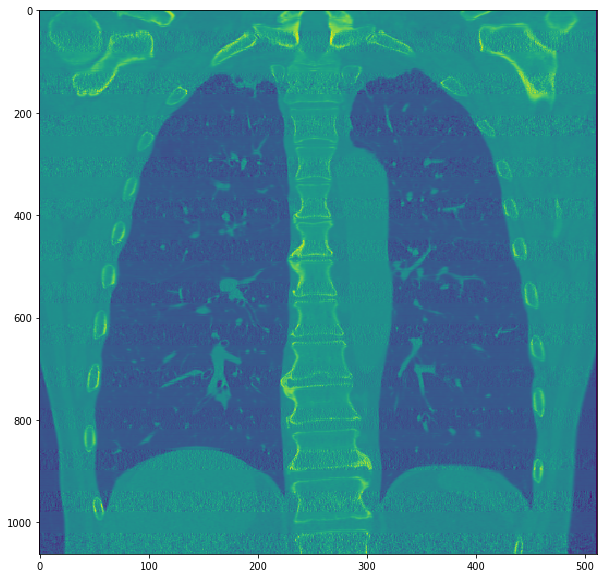

In [246]:
z_new = int(df['y'].iloc[0]) # y на сагитальном, z на фронтальном 
smile = img3d[z_new,:,:].T

fig, ax = plt.subplots()

ax.imshow(smile, aspect='auto')

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

In [111]:
img_shape[0]//2

256

width: 5.4347826086956275, height: 5.4347826086956275


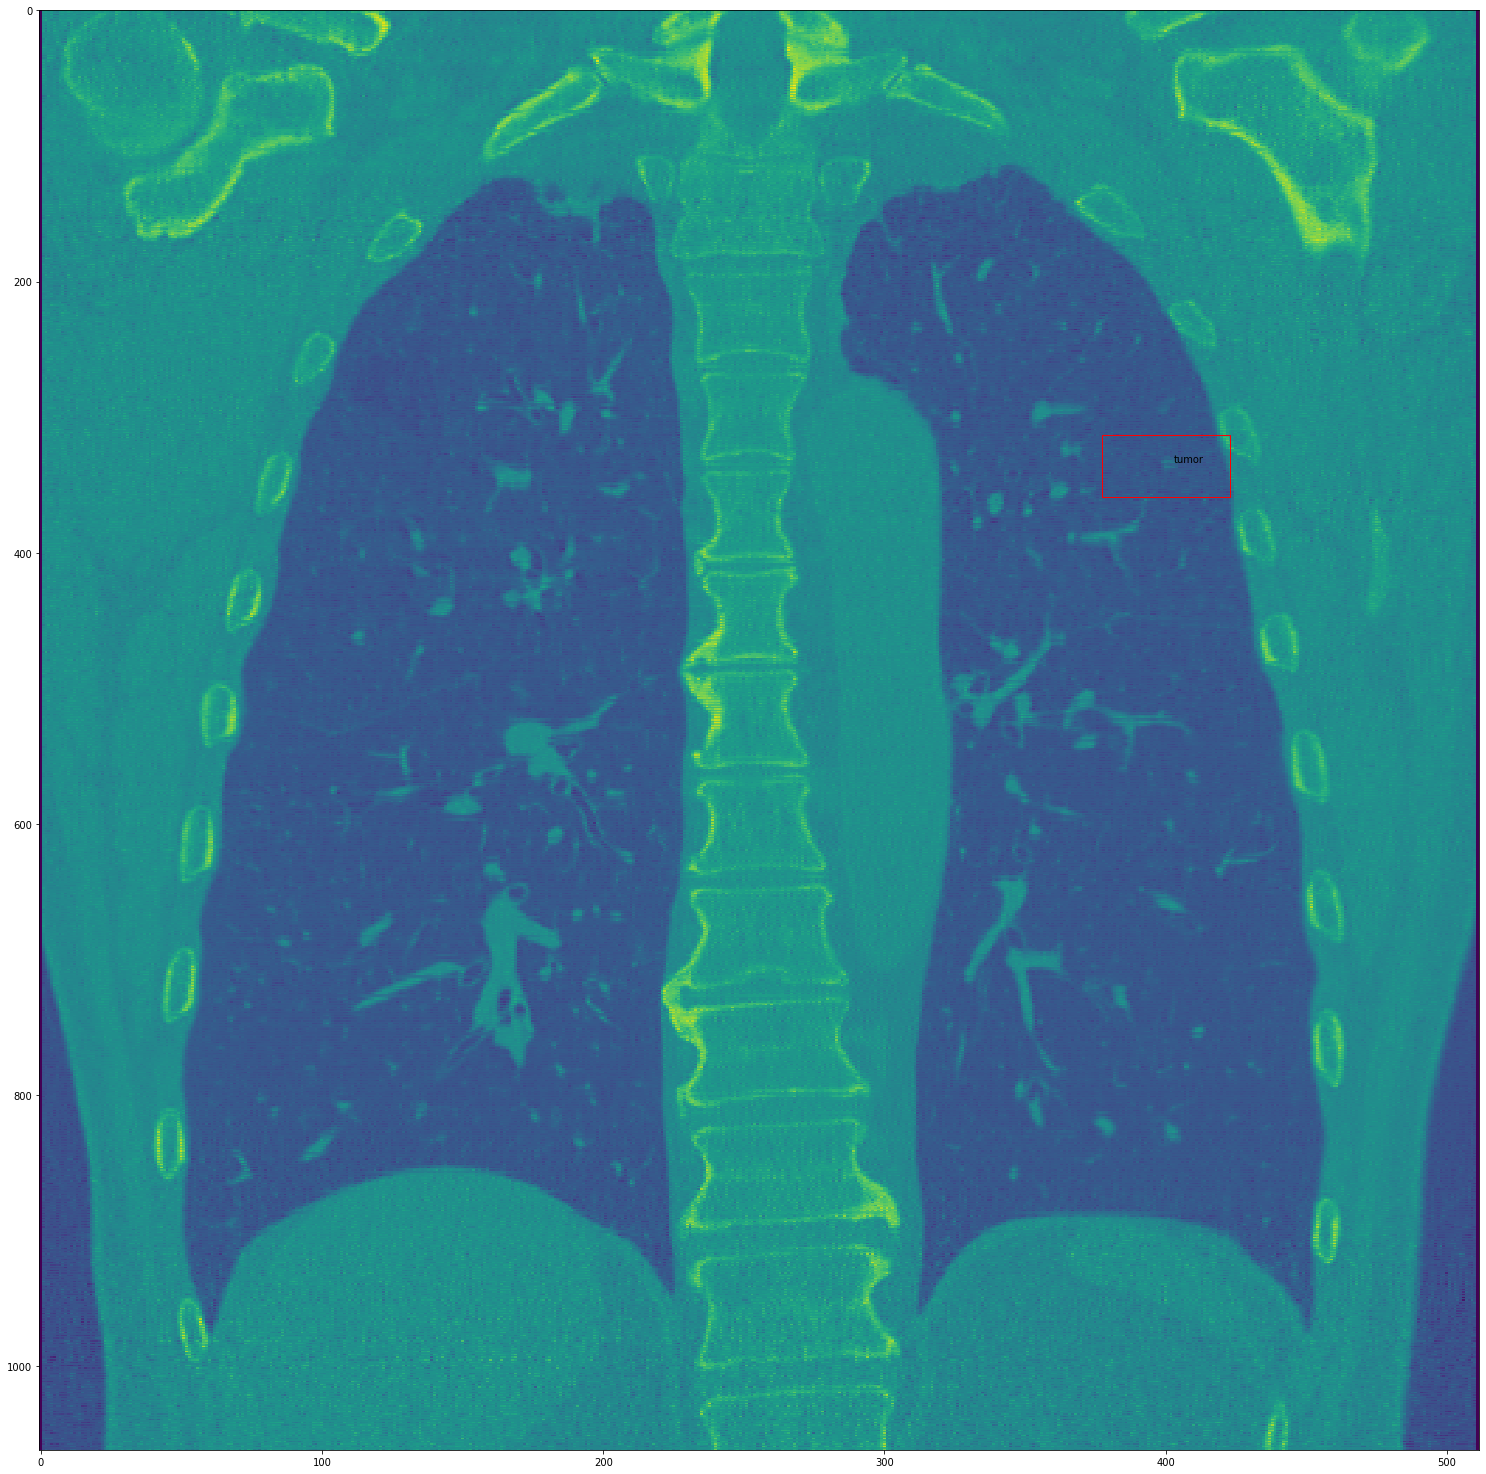

In [267]:
# Отрисовка рамки
from matplotlib import patches
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])
#def Patchfinder():
x = int(df['x'].iloc[0]) # x на фронтальном срезе
y = int(df['y'].iloc[0]) # z на фронтальном срезе
zm = int(df['z'].iloc[0]) # y на фронтальном срезе
z = ipp.index((nearest(ipp, zm)))
dm = 4
d = dm / slices[0].PixelSpacing[0]
xmin = x - d / 2
xmax = x + d / 2
ymin = z - d / 2
ymax = z + d / 2
width = xmax - xmin
height = ymax - ymin
print(f'width: {width}, height: {height}')
# read and plot the image
image = img3d[y,:,:].T
plt.imshow(image, aspect='auto')
plt.savefig('img\image')
edgecolor = 'r'
ax.annotate('tumor', xy=(xmax,ymin))
# rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
rect = patches.Rectangle((xmin-20,ymin-20), width+40, height+40, edgecolor = edgecolor, facecolor = 'none')
ax.add_patch(rect)
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(20)    #  высота "Figure"


# iterating over the image for different objects
# for _,row in train[train.image_names == "1.jpg"].iterrows():
#     xmin = row.xmin
#     xmax = row.xmax
#     ymin = row.ymin
#     ymax = row.ymax
    
#     width = xmax - xmin
#     height = ymax - ymin
    
#     # assign different color to different classes of objects
#     if row.cell_type == 'RBC':
#         edgecolor = 'r'
#         ax.annotate('RBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'WBC':
#         edgecolor = 'b'
#         ax.annotate('WBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'Platelets':
#         edgecolor = 'g'
#         ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
#     # add bounding boxes to the image
#     rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
#     ax.add_patch(rect)

# Поиск нужного слайда по z
def z_finder():
    for item in files_arr:
        #print(item)
        rf = pydicom.read_file(item)
        if rf.ImagePositionPatient[2] == 1737.3:
            plt.imshow(rf.pixel_array, cmap='gray', interpolation='none') 
        #print(rf.ImagePositionPatient)
        #print(f'Location: {rf.SliceLocation}, Instance Number: {rf.InstanceNumber}')
        #plt.imshow(rf.pixel_array, cmap='gray') 



In [264]:
plt.savefig('image')

<Figure size 432x288 with 0 Axes>

In [258]:
img3d.shape
slices[0].ImagePositionPatient[2]

"1813.5"

In [20]:
slices[0].PixelSpacing[0]

"0.988"

In [35]:
dm = 4
d = dm / slices[0].PixelSpacing[0]
d

4.048582995951417

In [36]:
slices[0].PixelSpacing[0]

"0.988"

In [38]:
max(ipp)

"2032.5"

In [39]:
min(ipp)

"1652.5"

In [41]:
zm = 1903.5 # y на фронтальном срезе
z = ipp.index(zm)
z

592

In [43]:
len(ipp)

1743

In [44]:
ipp[0]

"2032.5"

In [46]:
ipp[1742]

"1652.5"

In [206]:
# Чтение Json файлов
#js = pd.read_json ('RLADD01000009306_RLSDD01000009279.json', orient='records')
with open("RLADD01000009306_RLSDD01000009279.json", "r", encoding='utf-8') as read_file:
    a = str(read_file.read())
#     data = json.load(read_file, decode='utf-8')  # , decod='utf8'

In [207]:
a = a.replace('\n', '').replace('\t', '').replace('\ufeff', '')

In [208]:
# from pandas.io.json import json_normalize
b = json.loads(a)

In [209]:
b

{'doctors': [{'comment': '', 'id': '012'},
  {'comment': '', 'id': '013'},
  {'comment': '', 'id': '014'}],
 'ids': {'accession number': 'RLADD01000009306',
  'study id': 'RLSDD01000009279',
  'study instance uid': '1.2.276.0.7230010.3.1.2.1417964692.10880.1568735355.16970'},
 'nodules': [[{'012': {'diameter (mm)': 3.5,
     'expert decision': [{'comment': '',
       'decision': 'doubt',
       'id': 'Валерия',
       'machine learning': False,
       'proper size': True,
       'type': 'с'}],
     'series no': '4',
     'type': 'с',
     'version': '4.0',
     'x': 358.0,
     'y': 314.0,
     'z': 1903.7,
     'z type': 'mm'},
    '013': None,
    '014': None}],
  [{'012': None,
    '013': {'diameter (mm)': 4.0,
     'expert decision': [{'comment': '',
       'decision': 'confirmed',
       'id': 'Валерия',
       'machine learning': True,
       'proper size': True,
       'type': 'п'}],
     'series no': '5',
     'type': 'п',
     'version': '4.0',
     'x': 161.0,
     'y': 204.0

In [232]:
"""Бекап скрипта загрузи"""
# # Измененный скрипт загрузки, пока используем его

# # load the DICOM files
# files=[]
# files_arr = d
# #print('glob: {}'.format(sys.argv[1]))
# print('loading start...')
# for fname in files_arr:
    
#     #print("loading: {}".format(fname))
#     files.append(pydicom.read_file(fname))

# print("Loading done. File count: {}".format(len(files)))

# # skip files with no SliceLocation (eg scout views)
# slices=[]
# skipcount=0
# for f in files:
#     if hasattr(f, 'SliceLocation'):
#         slices.append(f)
#     else:
#         skipcount = skipcount + 1

# print("skipped, no SliceLocation: {}".format(skipcount))

# # ensure they are in the correct order
# print('Sorting start...')
# slices = sorted(slices, key=lambda s: s.SliceLocation)
# print('Sorting complete.')
# # pixel aspects, assuming all slices are the same
# ps = slices[0].PixelSpacing
# ss = slices[0].SliceThickness
# ax_aspect = ps[1]/ps[0]
# sag_aspect = ps[1]/ss
# cor_aspect = ss/ps[0]

# # create 3D array
# print('create 3D array start...')
# img_shape = list(slices[0].pixel_array.shape)
# img_shape.append(len(slices))
# img3d=np.zeros(img_shape)
# print('create 3D array complete.')


# # fill 3D array with the images from the files и добавление з
# print('fill 3D array start...')
# ipp = [] # ImagePositionPatient[2] будет храниться тут
# for i, s in enumerate(slices):
#     img2d = s.pixel_array
#     img3d[:,:,i] = img2d
#     ipp.append(slices[i].ImagePositionPatient[2])
# print('fill 3D array complete.')
# print('Well done!')
# #print(ipp)
# # plot 3 orthogonal slices
# # a1 = plt.subplot(2,2,1)
# # plt.imshow(img3d[:,:,img_shape[2]//2])
# # a1.set_aspect(ax_aspect)

# # a2 = plt.subplot(2,2,2)
# # plt.imshow(img3d[:,img_shape[1]//2,:])
# # a2.set_aspect(sag_aspect)

# # a3 = plt.subplot(2,2,3)
# # plt.imshow(img3d[img_shape[0]//2,:,:].T)
# # a3.set_aspect(cor_aspect)

# # plt.show()

loading start...
Loading done. File count: 1062
skipped, no SliceLocation: 0
Sorting start...
Sorting complete.
create 3D array start...
create 3D array complete.
fill 3D array start...
fill 3D array complete.
